# Trabajo Semanal N° 2

### Autor: Gonzalo Goumaz


## Circuito bajo análisis

La red sometida a este análisis se corresponde con la estructura Äckerberg-Mossberg
<img src="red_ts2.png">


## Obtención de la función transferencia y asignación de valores

En el siguiente PDF se desarrollan los puntos 1), 2), 3), bonus1) y bonus2).

In [1]:
from IPython.display import IFrame
IFrame("./TS2_LP.pdf", width = 900, height = 900)

## Simulacion para el filtro obtenido en el punto 1)
Para el filtro obtenido en 1) se realizan las simulaciones correspondientes mediante Python y LTSpice.
### Simulación en Python

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

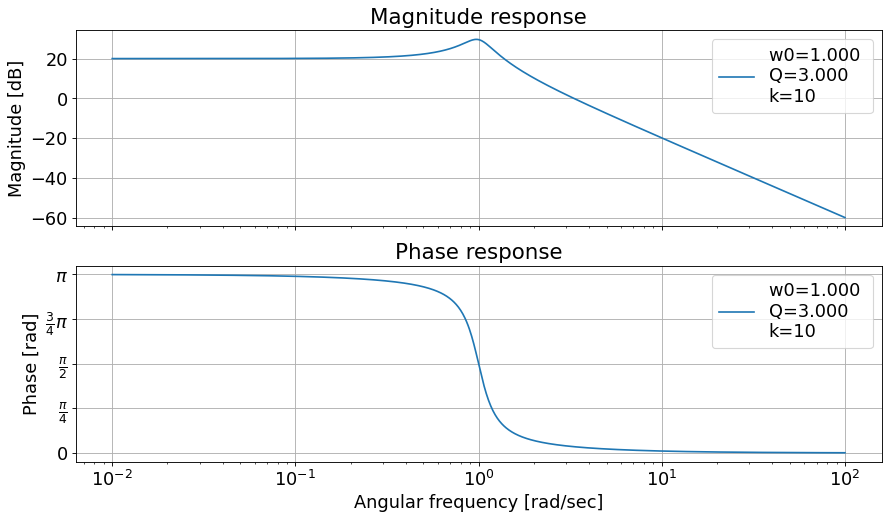

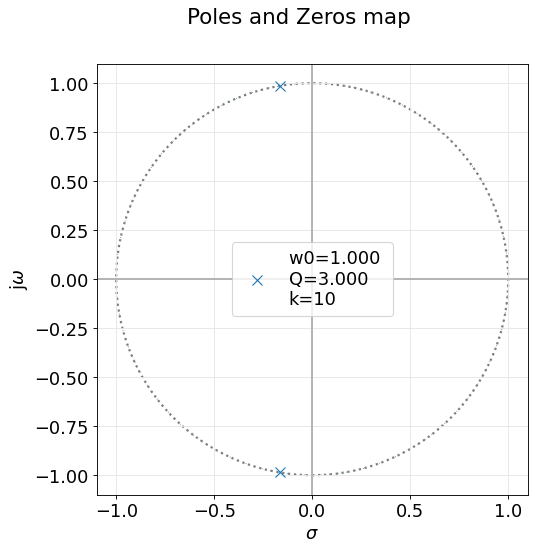

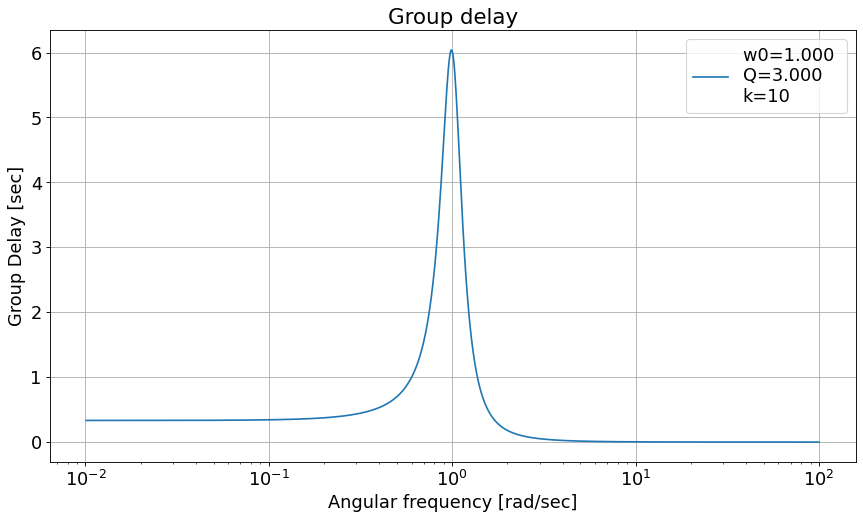

In [2]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import pzmap, bodePlot, GroupDelay
import math as m

# Para fijar el estilo de gráficos en el notebook

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80
fig_font_size = 16

plt.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
plt.rcParams['figure.dpi'] = (fig_dpi)
plt.rcParams.update({'font.size':fig_font_size})

# Defino los parámetros
w0 = 1
Q  = 3 
k  = 10

# Armo la función transferencia

my_tf = TransferFunction([-k],[1, w0/Q, w0**2])

# Grafico los diagramas de Bode y de Group Delay

bodePlot(my_tf, fig_id=1, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nk={}'.format(w0,Q,k))
pzmap(my_tf, fig_id=2, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nk={}'.format(w0,Q,k))
GroupDelay(my_tf, fig_id=3, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nk={}'.format(w0,Q,k))


### Simulación en LTSpice
<img src="draft_Ackerberg-Mossberg.png">
<img src="Spice_sim_LP.png"

## Transferencia tipo Butterworth (bonus 3)
Una transferencia Butterworth de segundo órden está caracterizada por
\begin{equation}
    T_B(S) = \frac{1}{S^2+S \sqrt{2} + 1}
\end{equation}
Si la comparamos con la transferencia obtenida en el punto 1), dejando de lado a el factor $-k$ que es el que determina la ganancia, se observa que para lograr una transferencia de tipo Butterworth se debe cumplir que
\begin{equation}
    Q = \frac{1}{\sqrt{2}}
\end{equation}


(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

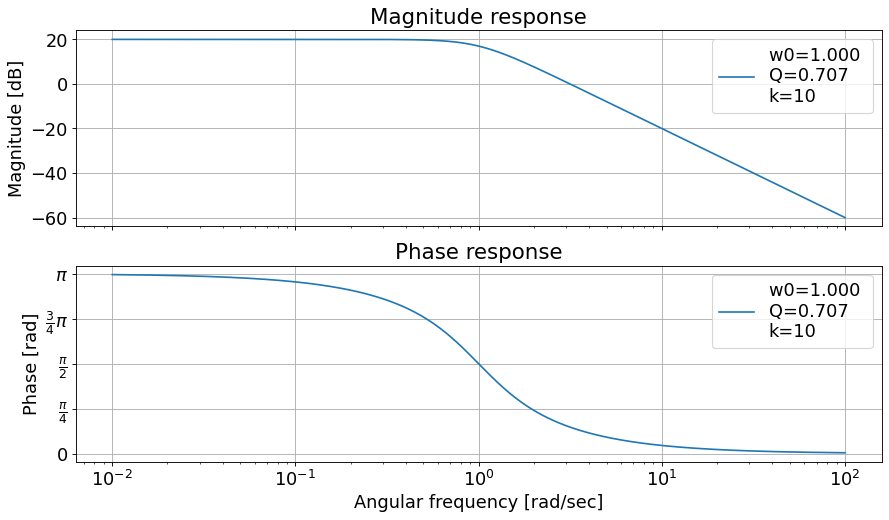

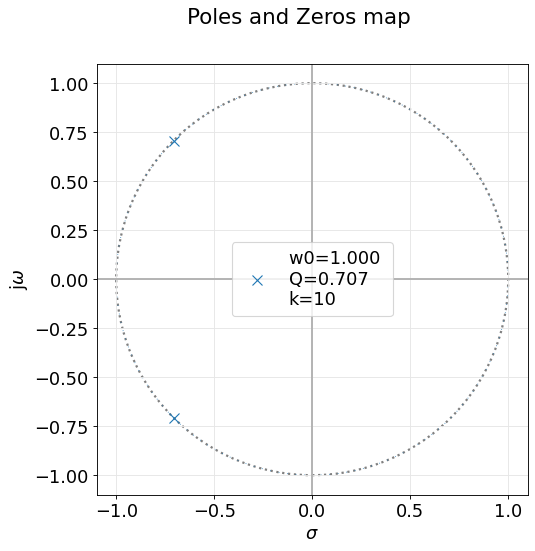

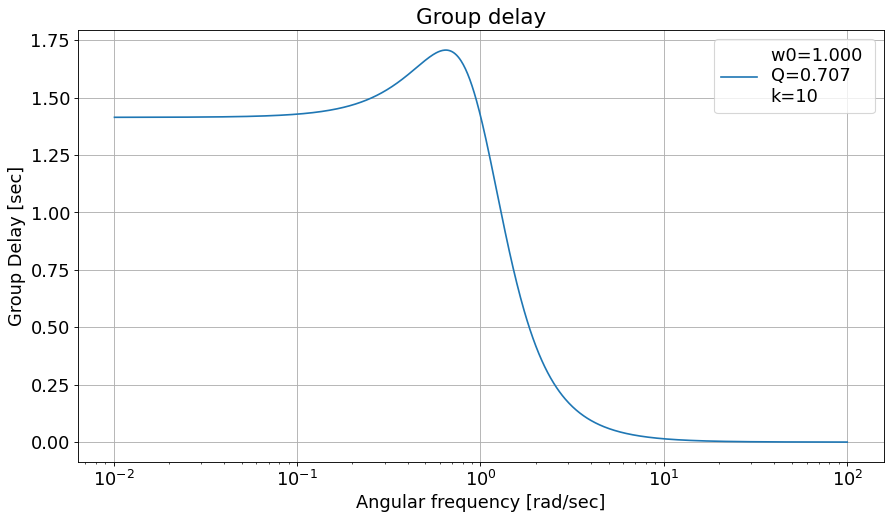

In [3]:
Q = 1/m.sqrt(2)

my_tf = TransferFunction([-k],[1, w0/Q, w0**2])

bodePlot(my_tf, fig_id=1, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nk={}'.format(w0,Q,k))
pzmap(my_tf, fig_id=2, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nk={}'.format(w0,Q,k))
GroupDelay(my_tf, fig_id=3, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nk={}'.format(w0,Q,k))


## Filtro Pasa Banda (bonus 4)

In [4]:
IFrame("./TS2_BP.pdf", width = 900, height = 900)

### Simulación Python

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

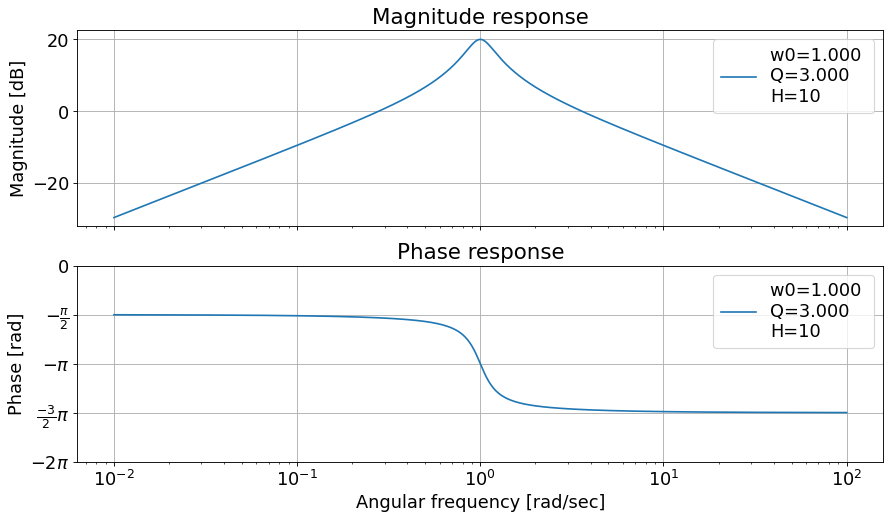

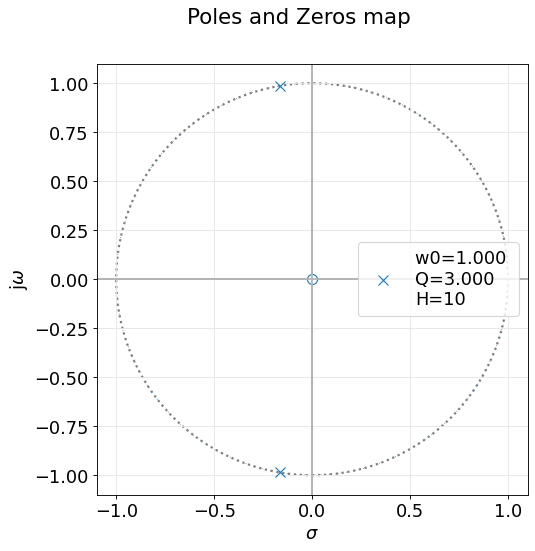

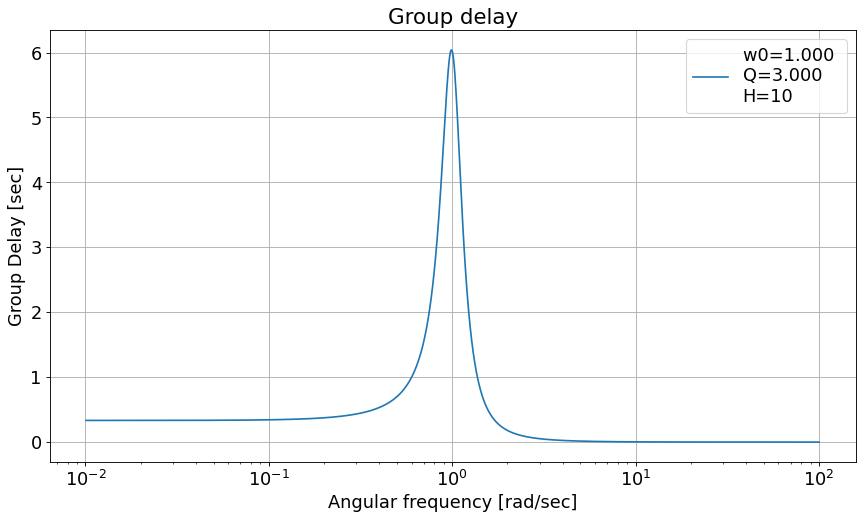

In [5]:
w0 = 1
Q  = 3 
H  = 10
k  = H/Q

my_tf = TransferFunction([-k, 0],[1, w0/Q, w0**2])

bodePlot(my_tf, fig_id=1, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nH={}'.format(w0,Q,H))
pzmap(my_tf, fig_id=2, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nH={}'.format(w0,Q,H))
GroupDelay(my_tf, fig_id=3, filter_description = 'w0={:3.3f} \nQ={:3.3f}\nH={}'.format(w0,Q,H))



### Simulación LTSpice
Para mantener una ganancia de 20dB en la banda de paso fue necesario reajustar el valor de R1 según lo expuesto en el desarrollo.
<img src="./Spice_sim_BP.png">